# Stroke Prediction Dataset (Logistic Regression)

**Context:**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Attribute Information:**
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# The Imports

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data

In [44]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [45]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [46]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [47]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data cleaning

**Using heatmap we can easily visualize the null values in dataset.**

<AxesSubplot:>

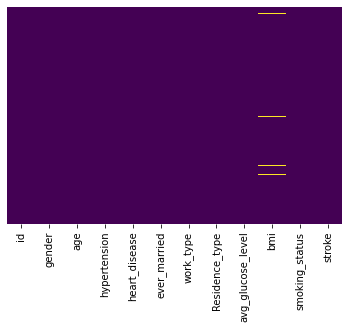

In [48]:
sns.heatmap(stroke_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**From the above visualization we can see bmi has some null values.Hence, bmi depends on gender as we can see from jointplot**

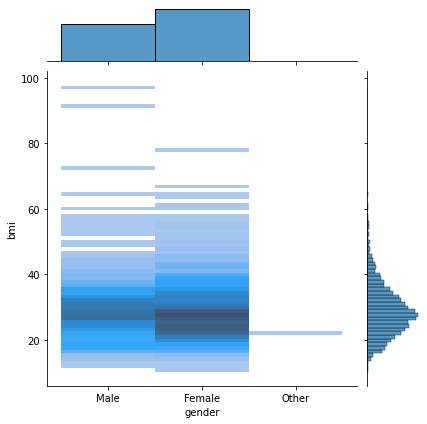

In [49]:
sns.jointplot(x='gender',y='bmi',data=stroke_data,kind='hist')

**To fee null value we use median accourding to gender**

In [50]:
stroke_data.groupby(['gender'])['bmi'].agg(['mean', 'median'])

,mean,median
gender,,
Female,29.065758,27.8
Male,28.647936,28.4
Other,22.400000,22.4


In [51]:
# filling all null values with their gender respective median values

stroke_data.bmi[stroke_data.gender=='Female'] = stroke_data.bmi[stroke_data.gender=='Female'].fillna(27.8)
stroke_data.bmi[stroke_data.gender=='Male'] = stroke_data.bmi[stroke_data.gender=='Male'].fillna(28.4)
stroke_data.bmi[stroke_data.gender=='Other'] = stroke_data.bmi[stroke_data.gender=='Other'].fillna(22.4)

<ipython-input-51-89dd19b74b63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_data.bmi[stroke_data.gender=='Female'] = stroke_data.bmi[stroke_data.gender=='Female'].fillna(27.8)
<ipython-input-51-89dd19b74b63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_data.bmi[stroke_data.gender=='Male'] = stroke_data.bmi[stroke_data.gender=='Male'].fillna(28.4)
<ipython-input-51-89dd19b74b63>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

**As we can see the perfect purple rectangle.we conclude our data is cleaned.**

<AxesSubplot:>

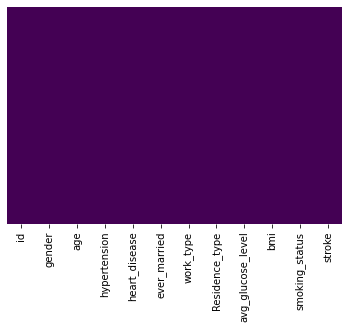

In [52]:
sns.heatmap(stroke_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Data Visualization


c:\users\swapnil\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

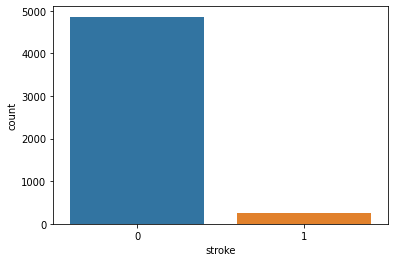

In [53]:
sns.countplot('stroke',data=stroke_data)

<AxesSubplot:xlabel='stroke', ylabel='count'>

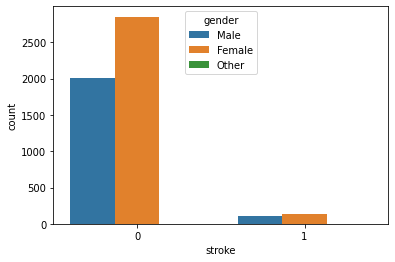

In [54]:
sns.countplot(x='stroke',data=stroke_data,hue='gender')

**From above plots we can see our target data is imbalance. To overcome this problem we use oversampling techniques.**

<AxesSubplot:xlabel='bmi', ylabel='Count'>

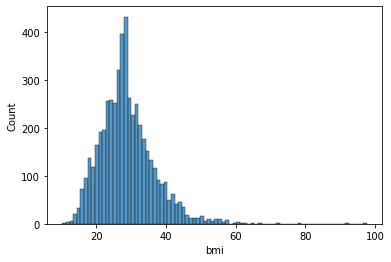

In [55]:
sns.histplot(x='bmi',data=stroke_data)

In [56]:
# dropping bmi outliers

stroke_data = stroke_data.loc[~(stroke_data.bmi>60)]
stroke_data.shape

(5097, 12)

In [57]:
# since "Other" gender is only one instance in the data so let's drop it

stroke_data = stroke_data.loc[~(stroke_data.gender=="Other")]
stroke_data.shape

(5096, 12)

In [58]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.8,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Mapping of categorical data.**

In [59]:
gender_map = {'Male':1, 'Female':0}
married_map = {'Yes':1, 'No':0}
stroke_data.gender = stroke_data.gender.map(gender_map)
stroke_data.ever_married = stroke_data.ever_married.map(married_map)

In [61]:
residence_map = {'Urban':1, 'Rural':0}
stroke_data.Residence_type = stroke_data.Residence_type.map(residence_map)

**Dummie variables of multipe categorical data.**

In [63]:
work = pd.get_dummies(stroke_data['work_type'],drop_first=True)
smoking = pd.get_dummies(stroke_data['smoking_status'],drop_first=True)

In [64]:
stroke_data.drop(['work_type','smoking_status'],axis=1,inplace=True)

In [65]:
stroke_data = pd.concat([stroke_data,work,smoking],axis=1)

# Final Data for logisctic regression model

In [66]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,27.8,1,0,0,1,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = stroke_data.drop('stroke',axis=1)
y = stroke_data['stroke']

#oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, y = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\swapnil\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
predictions = logmodel.predict(X_test)

# Evaluation of model

In [73]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1462
           1       0.84      0.85      0.84      1447

    accuracy                           0.84      2909
   macro avg       0.84      0.84      0.84      2909
weighted avg       0.84      0.84      0.84      2909



[[1220  242]
 [ 221 1226]]


**Conclusion : Succesfully predicted the stroke based on the input parameters like gender, age, various diseases, and smoking status with overall 85% of accuracy.**